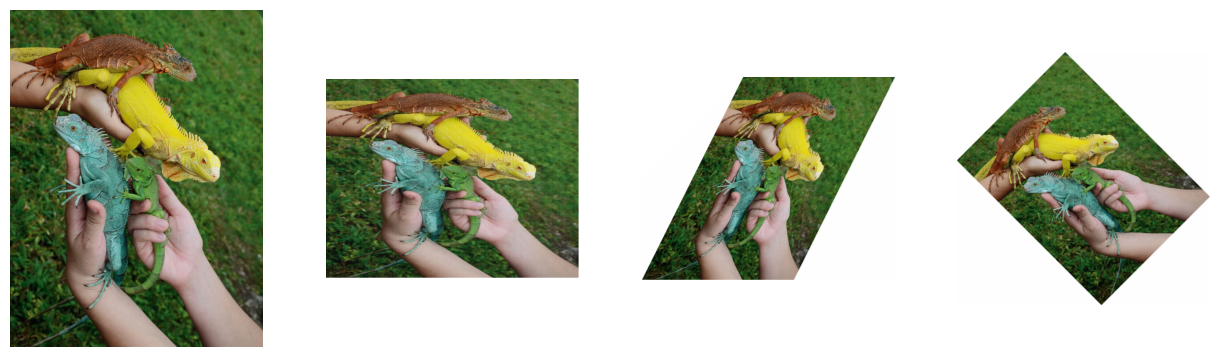

In [39]:
# Transform an image
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

def imtrans(img, A):   # transform img with A, with origin placed at center of image

    m,n,p = img.shape
    #imp = img.shape
    #m = imp[0]               # img has m rows and n columns
    #n = imp[1]
    #if (len(imp) > 2):
       # p = imp[2]
        
    miny0, maxy0, miny1, maxy1 = 0, 0, 0, 0    # these will hold shape of the new image

    for i in [0, m-1]:   # scan top and bottom
        x = np.array([0, int(m/2)-i])
        for j in range(n):
            x[0] = j-int(n/2)
            y = A@x
            miny0, maxy0, miny1, maxy1 = min(y[0], miny0), max(y[0], maxy0), min(y[1], miny1), max(y[1], maxy1)
 
    for j in [0, n-1]:   # scan left and right
        x = np.array([j-int(n/2), 0])
        for i in range(m):
            x[1] = int(m/2)-i
            y = A@x
            miny0, maxy0, miny1, maxy1 = min(y[0], miny0), max(y[0], maxy0), min(y[1], miny1), max(y[1], maxy1)

    N = int(np.ceil(maxy0 - miny0)) + 2  # adding 2 to "compensate" for int induced "errors"
    M = int(np.ceil(maxy1 - miny1)) + 2

    img2 = 255*np.ones((M,N,3), dtype='int')     # create a white canvas of sufficient size

    for i in range(m):                         # step through the rows                       
        for j in range(n):                     # step through the columns 
            x = np.array([j-int(n/2), int(m/2)-i])
            y = A@x
            J = int(y[0] + int(N/2))
            I = int(int(M/2) - y[1])
            for k in range(3):
                img2[I, J, k] = img[i, j, k] 
       
    
    for i in range(1,M-1):    # paint empty (255) pixels with local average, avoiding edges
        for j in range(1,N-1):
            for k in range(3):
                if (img2[i,j,k] >250) :
                    s = img2[i-1,j-1,k]+img2[i-1,j,k]+img2[i-1,j+1,k]+img2[i,j-1,k]+img2[i,j+1,k]+img2[i+1,j-1,k]+img2[i+1,j,k]+img2[i+1,j+1,k]
                    img2[i,j,k] = int(s/8)
    
    return img2

img = plt.imread('iguana-iguana.jpg')
ax1.imshow(img)
ax1.axis('off')

a = 1.3
A = np.array([[a,0],[0,1/a]])  # dilation

img2 = imtrans(img, A)
ax2.imshow(img2)
ax2.axis('off')

a = 0.5
N = np.array([[1,a],[0,1]])    # shear
img2 = imtrans(img, N)
ax3.imshow(img2)
ax3.axis('off')

a = np.pi/4
K = np.array([[np.cos(a), -np.sin(a)],[np.sin(a), np.cos(a)]])   # rotation
img2 = imtrans(img, K)
ax4.imshow(img2)
ax4.axis('off');
